# Imports

In [1]:
import pandas as pd
import numpy as np
import missingno
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns


# Question 1:

### Reading the dataset

In [2]:
df_raw = pd.read_csv('Volley_Ball_Score.csv')
df_raw

,Unnamed: 0,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Performance,Country,Players_Injured
0,0,-0.2924,-0.3871,0.8317,0.2060,NaN,0.2060,-0.2424,82.9055,below_average,France,1
1,1,0.1389,0.3659,0.5547,NaN,0.6240,NaN,1.1762,27.3858,below_average,Finland,2
2,2,0.9248,-2.3541,0.8332,-0.0715,0.1905,-0.0715,-0.7963,78.9628,neutral,Germany,0
3,3,-0.4830,0.2304,-1.0753,-0.0744,-1.1175,-0.0744,-3.0012,80.2715,below_average,Finland,0
4,4,-0.6334,1.3354,2.0009,-0.3142,-0.7913,-0.3142,-0.0846,102.4383,average,Norway,1
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,-2.4103,-0.2195,1.8519,NaN,0.9716,NaN,-0.2128,114.0887,below_average,Switzerland,1
416,416,0.1458,-0.0600,-0.1449,NaN,NaN,NaN,3.0714,21.9961,above_average,Finland,1
417,417,-0.4520,0.0608,-0.9824,0.9211,1.5176,0.9211,-0.1139,50.7298,neutral,Italy,0
418,418,0.3949,-0.0913,0.0339,NaN,0.7586,NaN,0.0767,11.3839,extraordinary,Germany,1


In [3]:
df_raw.shape

(420, 12)

### Checking and changing types

In [4]:
df_raw.dtypes

Unnamed: 0           int64
Player_Score_0     float64
Player_Score_1     float64
Player_Score_2     float64
Player_Score_3     float64
Player_Score_4     float64
Player_Score_5     float64
Player_Score_6     float64
Score              float64
Performance         object
Country             object
Players_Injured      int64
dtype: object

In [5]:
data_types_dict = {'Performance': 'category', 'Country': 'category'}
df_raw = df_raw.astype(data_types_dict)
df_raw.dtypes

Unnamed: 0            int64
Player_Score_0      float64
Player_Score_1      float64
Player_Score_2      float64
Player_Score_3      float64
Player_Score_4      float64
Player_Score_5      float64
Player_Score_6      float64
Score               float64
Performance        category
Country            category
Players_Injured       int64
dtype: object

There are 9 Numerical features and 2 Categorical features

In [6]:
df_raw

,Unnamed: 0,Player_Score_0,Player_Score_1,Player_Score_2,Player_Score_3,Player_Score_4,Player_Score_5,Player_Score_6,Score,Performance,Country,Players_Injured
0,0,-0.2924,-0.3871,0.8317,0.2060,NaN,0.2060,-0.2424,82.9055,below_average,France,1
1,1,0.1389,0.3659,0.5547,NaN,0.6240,NaN,1.1762,27.3858,below_average,Finland,2
2,2,0.9248,-2.3541,0.8332,-0.0715,0.1905,-0.0715,-0.7963,78.9628,neutral,Germany,0
3,3,-0.4830,0.2304,-1.0753,-0.0744,-1.1175,-0.0744,-3.0012,80.2715,below_average,Finland,0
4,4,-0.6334,1.3354,2.0009,-0.3142,-0.7913,-0.3142,-0.0846,102.4383,average,Norway,1
...,...,...,...,...,...,...,...,...,...,...,...,...
415,415,-2.4103,-0.2195,1.8519,NaN,0.9716,NaN,-0.2128,114.0887,below_average,Switzerland,1
416,416,0.1458,-0.0600,-0.1449,NaN,NaN,NaN,3.0714,21.9961,above_average,Finland,1
417,417,-0.4520,0.0608,-0.9824,0.9211,1.5176,0.9211,-0.1139,50.7298,neutral,Italy,0
418,418,0.3949,-0.0913,0.0339,NaN,0.7586,NaN,0.0767,11.3839,extraordinary,Germany,1


### Checking duplicates

In [7]:
df_raw.duplicated(keep=False).sum()

0

### Checking nulls

In [8]:
df_raw.isnull().mean()

Unnamed: 0         0.000000
Player_Score_0     0.000000
Player_Score_1     0.000000
Player_Score_2     0.000000
Player_Score_3     0.280952
Player_Score_4     0.185714
Player_Score_5     0.350000
Player_Score_6     0.000000
Score              0.000000
Performance        0.000000
Country            0.000000
Players_Injured    0.000000
dtype: float64

In [9]:
df_raw.isnull().sum().sum()


343

3 columns have have missing values but none of them have more than 70% of rows with missing data. I will handle the missing values instead of elimination. 

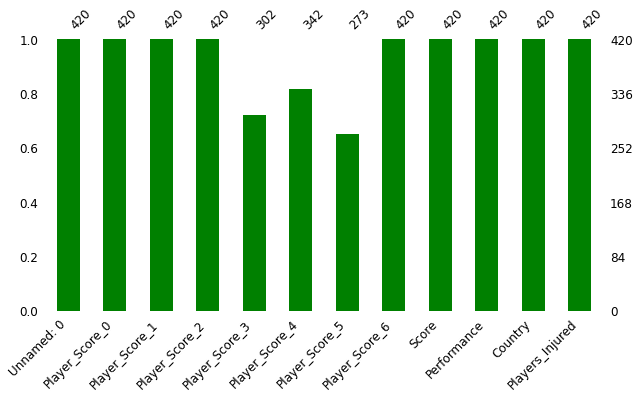

In [10]:
missingno.bar(df_raw.iloc[:,:],color="green", figsize=(10,5), fontsize=12);


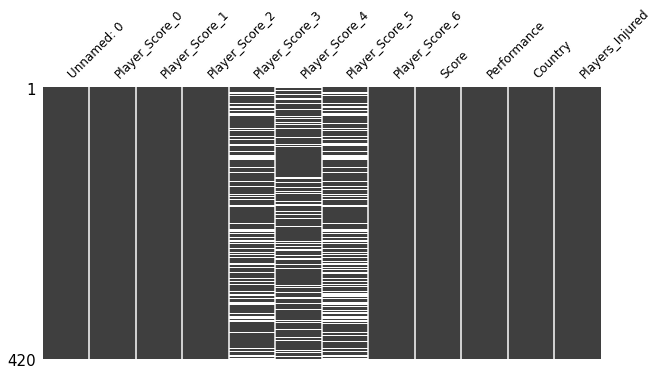

In [11]:
missingno.matrix(df_raw.iloc[:,:],figsize=(10,5), fontsize=12,sparkline=False);


array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'Player_Score_0'}>,
        <AxesSubplot:title={'center':'Player_Score_1'}>],
       [<AxesSubplot:title={'center':'Player_Score_2'}>,
        <AxesSubplot:title={'center':'Player_Score_3'}>,
        <AxesSubplot:title={'center':'Player_Score_4'}>],
       [<AxesSubplot:title={'center':'Player_Score_5'}>,
        <AxesSubplot:title={'center':'Player_Score_6'}>,
        <AxesSubplot:title={'center':'Score'}>],
       [<AxesSubplot:title={'center':'Players_Injured'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

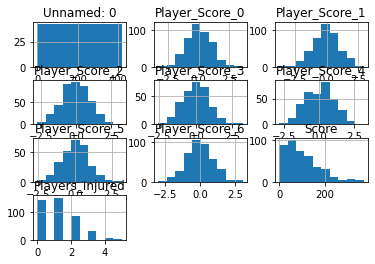

In [12]:
df_raw.iloc[:,:].hist()


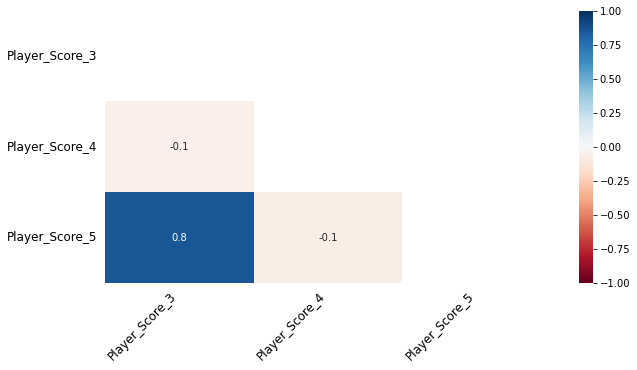

In [13]:
missingno.heatmap(df_raw.iloc[:,:8], figsize=(10,5), fontsize=12);

Making a deep copy of the dataset and using different duplicate filling methods.

## Duplicates with kNN

In [14]:
df = df_raw.copy(deep=True)
df.drop(columns=['Country', 'Performance','Unnamed: 0'], inplace=True)


from sklearn.impute import KNNImputer
knn_imp = KNNImputer(n_neighbors=3)
# fit and transform the imputer on the dataset 
df_knn= pd.DataFrame(knn_imp.fit_transform(df), columns=df.columns)

In [15]:
df_knn.isnull().sum()

Player_Score_0     0
Player_Score_1     0
Player_Score_2     0
Player_Score_3     0
Player_Score_4     0
Player_Score_5     0
Player_Score_6     0
Score              0
Players_Injured    0
dtype: int64

### Plots of before and after

<AxesSubplot:ylabel='Density'>

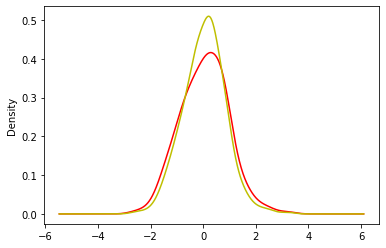

In [16]:
df['Player_Score_5'].plot.kde(color='r')
df_knn["Player_Score_5"].plot.kde(color='y')

0.06357975816122968

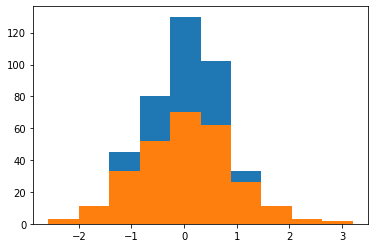

In [17]:
#calculating the jensenshannon distance between the probability distributions before and after imputation
from scipy.spatial import distance

counts_imputed,nins_imputed,values_imputed = plt.hist(df_knn["Player_Score_5"])
counts_imputed_probabilities = counts_imputed / counts_imputed.sum()

# probability distribution before imputation
counts,nins,values = plt.hist(df["Player_Score_5"])
counts_probabilities = counts / counts.sum()

# pdf distance calculation
distance.jensenshannon(counts_imputed_probabilities,counts_probabilities)


I won't use this because I can't predict a value between non correlated values such as different teams

## Duplicates with Regression

<AxesSubplot:>

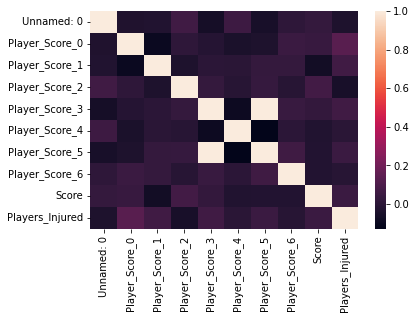

In [18]:
sns.heatmap(df_raw.corr())

In [52]:
#Choosing the columns without nan values to impute Player_Score_5.
df_regr = df_raw[['Player_Score_1','Player_Score_2','Player_Score_3','Player_Score_4','Player_Score_5']]
df_regr.dropna(df['Player_Score_3'])


from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()


train_data = df_regr[df_regr['Player_Score_5'].isnull()==False]
test_data = df_regr[df_regr['Player_Score_5'].isnull()==True]

ps_5_before_imp = train_data['Player_Score_5']

y = train_data['Player_Score_5'] #target is "Player_Score_5"
train_data.drop("Player_Score_5",axis=1,inplace=True) 
#features are all other features except "Player_Score_5"

lr_model.fit(train_data,y)

test_data.drop("Player_Score_5",axis=1,inplace=True)

# infer the missing values with the learned model
pred = lr_model.predict(test_data)
test_data['Player_Score_5']= pred


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\2491396047.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df_regr.dropna(df['Player_Score_3'])


TypeError: unhashable type: 'Series'

In [40]:
ps_5_lr = ps_5_before_imp.append(test_data['Player_Score_5'])

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_24332\3400574187.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  ps_5_lr = ps_5_before_imp.append(test_data['Player_Score_5'])


<AxesSubplot:ylabel='Density'>

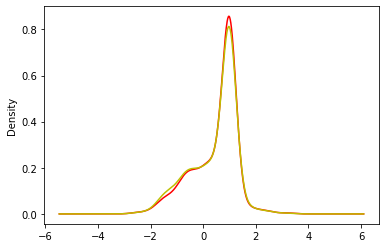

In [41]:
#visualising the distribution before and after imputation

#plotting the pdf after imputation
df_regr['Player_Score_5'].plot.kde(color='r')


#plotting the pdf before imputation
ps_5_lr.plot.kde(color='y')

In [38]:
ps_5_lr.shape

(420,)

### (a) Verify the features values distribution of the numerical variables?


### (b) Is features transformation necessary for the numerical variables? Let’s take into account that we are preparing the dataset for a Linear Regression task, with the goal of building a "Score" predictive model. If transformation is necessary, after justifying your choices, do proceed as described.

### (c) Verify the presence of outliers and eventually handle them. Justify your choices.

### (d) Is encoding necessary for the categorical variables? If yes, which kind of encoding? Specify your choices, justify them and perform categorical data encoding, if necessary.

### (e) Increase the dimensionality of the dataset introducing Polynomial Features – degree = 3 (continuous variables)

### (f) Eventually include any other transformation which might be necessary/appropriate and justify your choices.

## 3. Features Selection

### (a) Perform One Way ANOVA and test the relationship between variable Country and Score. Eventually, consider the possibility to remove the feature. Justify your choice.

### (b) Perform Features Selection and visualize the features which have been selected. Select one appropriate methodology for features selection and justify your choice.

## 4. Linear Regression

### (a) Train a Multiple Linear Regression model, using the Sklearn implementation of Linear Regression to find the best 𝜽 vector. Use all the transformed features, excluding the derived polynomial features. Evaluate the model with the learned 𝜽 on the test set.


### (b) Use all the transformed features, excluding the derived polynomial features, to identify the best values of 𝜽 by means of a Batch Gradient Descent procedure. Identify the best values of 𝜼 (starting with an initial value of 𝜼 = 0.1 ). Evaluate the model with the trained 𝜽 on the test set. Plot the train and the test error for increasing number of iterations of the Gradient Descent procedure (with the best value of 𝜼). Provide a comment of the plot.


### (c) Use the complete set of features, including the derived polynomial features. Train a Multiple Linear Regression model, using the Sklearn implementation of Linear Regression to find the best 𝜽 vector. Evaluate the model with the learned 𝜽 on the test set. Plot the train and the test error for increasing the size of the train-set (with the best value of 𝜼). Provide a comment of the plot.


### (d) Use the complete set of features, including the derived polynomial features. Train a Ridge Regression model identifying the best value of the learning rate 𝜶 that allows the model to achieve the best generalization performances. Evaluate the model.


### (e) Use the complete set of features, including the derived polynomial features. Train a Linear Regression model with Lasso regularization. Comment on the importance of each feature given the related trained parameter value of the trained model. Also, verify the number of features selected (related coefficient 𝜽 different from zero) with different values of 𝛼.


### (f) Use the subset of features selected in the Feature Selection task (question 3b). Train a Multiple Linear Regression model using the Sklearn implementation of Linear Regression to find the best 𝜽 vector. Evaluate the model.


### (g) Create a table with the evaluation results obtained from all the models above on both the train and test sets.

### (h) Compare and discuss the results obtained above.